## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

## Load and prepare the dataset

In [3]:
df = pd.read_csv("Sonar.csv", header=None)
X, y = df.drop(60, axis=1), pd.get_dummies(df[60], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Function to build and compile the model

In [4]:
def build_model(with_dropout=False):
    model = keras.Sequential()
    model.add(keras.layers.Dense(60, input_dim=60, activation='relu'))
    if with_dropout: model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(30, activation='relu'))
    if with_dropout: model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(15, activation='relu'))
    if with_dropout: model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Train, evaluate, and display results for the model

In [8]:
def train_and_evaluate(with_dropout=False):
    model = build_model(with_dropout)
    history = model.fit(X_train, y_train, epochs=100, batch_size=8)
    eval_result = model.evaluate(X_test, y_test)
    y_pred = np.round(model.predict(X_test).reshape(-1))
    print(f'\nPerformance with {"Dropout" if with_dropout else "No Dropout"}:\n')
    print(f'Evaluation Result: {eval_result}')
    print(classification_report(y_test, y_pred))
    return history

## Plot training history

In [9]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

## Run the models and plot their training history

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6814 - accuracy: 0.5385
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6538
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7244
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7244
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7628
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5070 - accuracy: 0.7885
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.8013
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8013
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8013
Epoch 11/

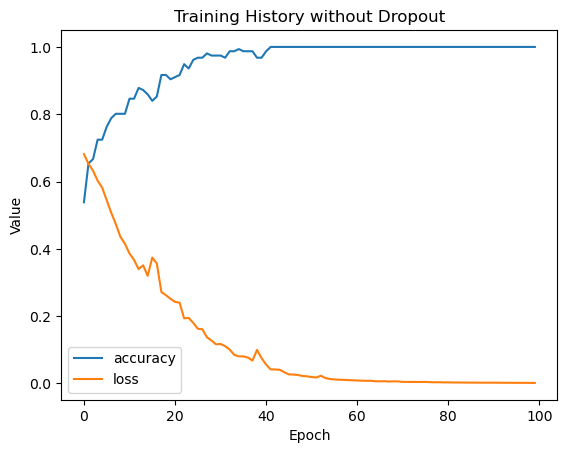

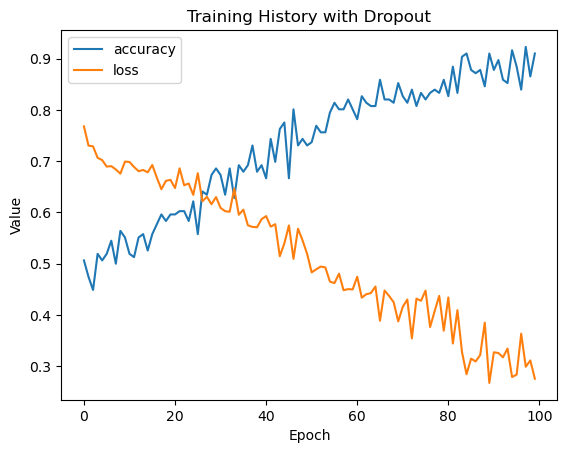

In [10]:
history_no_dropout = train_and_evaluate(with_dropout=False)
history_with_dropout = train_and_evaluate(with_dropout=True)
plot_history(history_no_dropout, 'Training History without Dropout')
plot_history(history_with_dropout, 'Training History with Dropout')